# Introduction to Julia
15.003 Software Tools\
MBAn Orientation 2024

by Sean Lo (`seanlo@mit.edu`) and Yu Ma (`midsumer@mit.edu`)


This notebook is an introduction to the Julia programming language, which is well-suited for scientific computing and developed at MIT. 
We'll introduce some of the components of the `Julia` language and noteworthy differences from Python (this notebook will assume that you have experience in Python or some other high-level programming language).

## Julia Basics

### Variables

Variables are exactly what you expect from a high-level language: they store numbers, text, and allow you to perform operations on them. Some examples:

In [1]:
mystring = "Hello world!" # Unlike Python, Julia requires double-quotes for strings
println(mystring) # Adds a newline character
print(mystring)
print(mystring)

Hello world!
Hello world!Hello world!

In [2]:
a = 1.0
b = 1
a == b # Tests for numerical equality

true

In [3]:
# Julia distinguishes between floating-point numbers and integers!
println(typeof(a)) 
println(typeof(b))

Float64
Int64


In [4]:
a === b

false

In [5]:
# You can convert between different numeric types:
println(typeof(Int(a)))
println(typeof(Float64(b)))

Int64
Float64


We can perform computations on numbers like a calculator:

In [7]:
# Exponentiation
println(2^6)    #                   (In Python, this is 2**6)
# Three different types of division...
println(9 / 4)  # Floating-point
println(9 // 4) # Rational
println(9 ÷ 4)  # Integer part      (In Python, this is 9 // 4)
# Remainder
println(9 % 4)  # Remainder

64
2.25
9//4
2
1


Just like in Python, there are updating versions of these operations:

In [8]:
a = 2
a += 1
a *= 3
a ^= 2
println(a)

81


Conversion of floating-point numbers to integers in Julia is explicit, unlike Python!!

In [9]:
println(round(9 / 4))
println(round(11 / 4))
println(ceil(9 / 4)) 
println(floor(11 / 4)) 
# Converting floats to ints should be explicit
println(Int(9 / 4)) 

2.0
3.0
3.0
2.0


LoadError: InexactError: Int64(2.25)

In [10]:
# Converting floats to ints should be explicit
println(Int(floor(9 / 4))) # Specify whether you want to take the floor or ceil or closest

2


### Arrays (v.s. lists in Python) - and vectorized operations

Arrays in Julia are like Python's `numpy` arrays: containers which can be flexible and general, or containing a single datatype and fast. They can be multi-dimensional too unlike Python lists. Some examples and common operations:

In [11]:
# Array comprehensions work in the same way as in Python
A = Int[] # empty array containing elements of type Int
push!(A, 1) # The `!` is a Julia convention that indicates that the function modifies its argument

1-element Vector{Int64}:
 1

In [12]:
push!(A, 2.5) # what do you think will happen?

LoadError: InexactError: Int64(2.5)

In [13]:
x = pop!(A)
x

1

In [20]:
size(A)

(3,)

In [19]:
println(A * 2)

[2, 4, 6]


In [18]:
println(A .* 2)

[2, 4, 6]


In [21]:
size(2)

()

In [ ]:
println(A .* 2)

In [14]:
A = [1, 2, 3]
println(A * 2)
println(A ^ 2)

[2, 4, 6]


LoadError: MethodError: no method matching ^(::Vector{Int64}, ::Int64)

[0mClosest candidates are:
[0m  ^([91m::Missing[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:165[24m[39m
[0m  ^([91m::Missing[39m, ::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:123[24m[39m
[0m  ^([91m::BigInt[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mgmp.jl:654[24m[39m
[0m  ...


In [15]:
# Vectorizing the exponent operation via a dot right before
println(A .^ 2)

[1, 4, 9]


In [22]:
A = [x^2 for x in 1:5]
A = [x^2 for x in 1:5 if x % 2 == 0] # Just like list comprehensions in Python!

2-element Vector{Int64}:
  4
 16

In [32]:
A = zeros((3, 4, 4))
A[:] .= 1:(3*4*4)
A

3×4×4 Array{Float64, 3}:
[:, :, 1] =
 1.0  4.0  7.0  10.0
 2.0  5.0  8.0  11.0
 3.0  6.0  9.0  12.0

[:, :, 2] =
 13.0  16.0  19.0  22.0
 14.0  17.0  20.0  23.0
 15.0  18.0  21.0  24.0

[:, :, 3] =
 25.0  28.0  31.0  34.0
 26.0  29.0  32.0  35.0
 27.0  30.0  33.0  36.0

[:, :, 4] =
 37.0  40.0  43.0  46.0
 38.0  41.0  44.0  47.0
 39.0  42.0  45.0  48.0

In [34]:
# Two-dimensional array
A = ones(Float64, (2, 3)) # Initializing a 2-by-3 array filled with 1.0
A[4] = 3
A[1,:] .= 5//2  # Note the dot, since we are assigning to multiple places in a slice
A               # Note how the elements are coerced to have type Float64?

2×3 Matrix{Float64}:
 2.5  2.5  2.5
 1.0  3.0  1.0

In [23]:
# Two-dimensional array
A = ones(Float64, (2, 3)) # Initializing a 2-by-3 array filled with 1.0
A[4] = 3
A[1,:] .= 5//2  # Note the dot, since we are assigning to multiple places in a slice
A               # Note how the elements are coerced to have type Float64?

2×3 Matrix{Float64}:
 2.5  2.5  2.5
 1.0  3.0  1.0

In [39]:
A * [-0.15000000000000016, 1.1, -0.1499999999999999] ≈ [2, 3]

true

In [35]:
println(A * [1 1; 2 4; 0 1])    # Matrix-matrix multiplication
println(A * [1, 2, 0])          # Matrix-vector multiplication
println(A \ (b = [2, 3]))             # Solving for x in Ax = b

[7.5 15.0; 7.0 14.0]
[7.5, 7.0]
[-0.15000000000000016, 1.1, -0.1499999999999999]


In [40]:
# Chaining comparisons (can Python do this?)
println(1 < 2 < 3)
# Broadcasting comparisons
A = rand(Float64, (2, 3))
A

true


2×3 Matrix{Float64}:
 0.672266  0.66418   0.435806
 0.683382  0.942961  0.430556

In [44]:
C = 0.25 .< A .< 0.75 # Returns a Boolean array of values in the middle quartiles

2×3 BitMatrix:
 1  1  1
 1  0  1

### 

In [45]:
A[C] .= 0
A

2×3 Matrix{Float64}:
 0.0  0.0       0.0
 0.0  0.942961  0.0

### Control Flow

Many control flow elements are the same as in Python, with some exceptions:
- the `end` keyword is used to close `if`, `for`, `while` blocks
- therefore, you don't need a colon at the end of the line, and you don't need indentation!

Conditional evaluation: the `if`-`elseif`-`else` block functions exactly like the `if`-`elif`-`else` block in Python. Something useful here is the logical operators `&&` (and) and `||` (or), which are short-circuiting (they evaluate left-to-right, terminating when a false value is found):

In [47]:
x = 2.5
if x % 2 == 0
    println("x is even")
elseif x % 2 == 1
    println("x is odd")
else
    println("x is not an integer")
end

x is not an integer


This can be expressed via a logical ternary operator too, which can also be chained:

In [50]:
x = 2.5
println(
    !isinteger(x)   ? "x is not an integer" :
    x % 2 == 0      ? "x is even"           : "x is odd"
)

x is not an integer


Here, we see how `&&` works as a logical "and" which evaluates the first statement, and if true evaluates the second statement.

In [55]:
x = 3
if isinteger(x) && x % 2 == 0
    message = "x is even"
elseif isinteger(x) && x % 2 == 1
    message = "x is odd"
# else
#     message = "x is not an integer"
end
println(message)

x is odd


For loops function just like in Python! In particular, the `break` keyword (early termination) and `continue` keyword (moving on to the next loop iteration) can be used inside for loops (and while loops too). The `eachindex()` function is the Julian way to iterate over the indices of a container, and it generalizes to various containers.

In [54]:
collect(1:5)

5-element Vector{Int64}:
 1
 2
 3
 4
 5

In [56]:
# For loop
for i in 1:5
    println(i)
end

1
2
3
4
5


LoadError: UndefVarError: `i` not defined

In [58]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
for char in alphabet # you can iterate over strings, yielding single characters
    println(lowercase(char))
    break # Just like in Python - early termination of a loop
end

a


In [62]:
for i in eachindex(alphabet) # using eachindex() is the Julian way to get the indices iterating over a collection
    if i < 21
        continue # Just like Python - moving to next iteration of loop
    end
    println("$i, $(alphabet[i])") # String interpolation uses the $ symbol, using brackets if necessary
end

21, U
22, V
23, W
24, X
25, Y
26, Z


Something to note: the indexing variable in a `for` loop does not remain available in scope after the loop, unlike in Python:

In [63]:
for ind in 1:5
    println(ind)
end
println(ind) # would give 5 in say Python

1
2
3
4
5


LoadError: UndefVarError: `ind` not defined

In [64]:
x = 0
while x < 250 # performs the loop contents while this condition is true
    x += 1
    x *= 2 
end
println(x)

254


In [65]:
mylist = ["A", "B", "C"]
while length(mylist) > 0
    pop!(mylist)
end
println(mylist)

LoadError: TypeError: non-boolean (Vector{String}) used in boolean context

In [66]:
x = 0
while true
    if x >= 250 # performs the loop contents while this condition is not yet satisfied
        break
    end
    x += 1
    x *= 2 
end
println(x)

254


### Exercise

Write a procedure which prints repeated applications of the Collatz function applied to the number 19, until the number 1 is reached. The Collatz function $f: \mathbb{N} \to \mathbb{N}$ is defined as:
$$ f(n) := \begin{cases}
    3n + 1 & \text{if $n$ odd} \\
    n / 2 & \text{if $n$ even}
\end{cases}
$$

Hint: the `%` and `÷` operator might be helpful here.

In [68]:
n = 10
# Write your code here!
while n > 1 # Be careful of entering an infinite loop!
    if n % 2 == 1
        n = 3*n + 1
    else
        n = n ÷ 2 # Note we use integer division!
    end
    println(n)
end

5
16
8
4
2
1


### Functions, Methods, and Multiple Dispatch
Functions are an essential part of every high-level language. Julia is no different, and 
it is [recommended](https://docs.julialang.org/en/v1/manual/performance-tips/#Performance-critical-code-should-be-inside-a-function) that re-usable chunks of code are moved into their own functions, which can contain other functions -- this helps Julia's compiler speed up computations.

Each function has a few basic components:
* name (this is what you will use to run the function)
* arguments/input data
* body (code that runs in the function)
* return value
The function is ended by a `end` keyword, just like the control flow elements -- notice how there are no colons as well.

In [71]:
function add_one(x) # name(arguments)
    # body of the function
    y = x + 1.0
    return y # return value
end
println(add_one(5.0))
println(add_one(5)) # What happens here?

6.0
6.0


What happened in the above example is that there was an automatic "promotion" going on in evaluating `5 + 1.0`; since the first argument is of type `Int` and the second of type `Float64`, the result got promoted to a common supertype `Float64` (you can read more [here](https://docs.julialang.org/en/v1/manual/conversion-and-promotion/#conversion-and-promotion)). Is there a way we can prevent that?

What is different in Julia is the idea of "methods". Methods are specific implementations of a function, for a possible combination of input argument types. This is important because the `add_one()` function might be optimized differently internally if the argument was a `Float64` or `Int` or `Real` type, and methods help detemine which implementation is used. From the Julia documentation:
> ...Thus, the overall behavior of a function is a patchwork of the behaviors of its various method definitions. If the patchwork is well designed, even though the implementations of the methods may be quite different, the outward behavior of the function will appear seamless and consistent.

This process of determining which method to use for given input arguments is known as **dispatch**. This is already present in languages like Python, where you can define classes and custom methods for each class (e.g. you can define a custom `MyFloat` class and a `MyFloat.add_one()` method). Using all of a function's arguments to choose which method should be invoked, rather than just the first, is known as **multiple dispatch**.
    

In [72]:
# This is a method definition for the `add_one` function
function add_one(x::Int) # type annotations for input arguments
    return x + 1
end
println(add_one(5))
println(add_one(5.0))

6
6.0


In [73]:
methods(add_one) # This tells me what methods I have defined so far for the `add_one` function

# 2 methods for generic function "add_one" from Main:
 [1] add_one(x::Int64)
     @ In[72]:2
 [2] add_one(x)
     @ In[71]:1

In this easy example however, we should take care not to overspecialize (define methods with narrow type input arguments). This is because the `+` operator is itself a function with its own methods! We can see that here:

In [74]:
methods(+)

# 189 methods for generic function "+" from Base:
   [1] +(a::Pkg.Resolve.FieldValue, b::Pkg.Resolve.FieldValue)
     @ Pkg.Resolve ~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Pkg/src/Resolve/fieldvalues.jl:43
   [2] +(x::Bool, z::Complex{Bool})
     @ complex.jl:305
   [3] +(x::Bool, y::Bool)
     @ bool.jl:166
   [4] +(x::Bool)
     @ bool.jl:163
   [5] +(x::Bool, z::Complex)
     @ complex.jl:312
   [6] +(x::Real, z::Complex{Bool})
     @ complex.jl:319
   [7] +(x::Bool, y::T) where T<:AbstractFloat
     @ bool.jl:173
   [8] +(x::Rational{BigInt}, y::Rational{BigInt})
     @ Base.GMP.MPQ gmp.jl:1061
   [9] +(a::Pkg.Resolve.VersionWeight, b::Pkg.Resolve.VersionWeight)
     @ Pkg.Resolve ~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Pkg/src/Resolve/versionweights.jl:22
  [10] +(x::Dates.Date, y::Dates.Day)
     @ Dates ~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:81
  [11] +(x::Dates.Date, y::Dates.Week)
     @ Dates ~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:79
  [12] +(x::Dates.Date, y::Dates.Quarter)
     @ Dates ~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:75
  [13] +(dt::Dates.Date, z::Dates.Month)
     @ Dates ~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:56
  [14] +(dt::Dates.Date, y::Dates.Year)
     @ Dates ~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:29
  [15] +(dt::Dates.Date, t::Dates.Time)
     @ Dates ~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:21
  [16] +(x::Dates.CompoundPeriod, y::Dates.CompoundPeriod)
     @ Dates ~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Dates/src/periods.jl:334
  [17] +(x::Dates.CompoundPeriod, y::Dates.TimeType)
     @ Dates ~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Dates/src/periods.jl:362
  [18] +(x::Dates.CompoundPeriod, y::Dates.Period)
     @ Dates ~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Dates/src/periods.jl:332
  [19] +(x::Dates.DateTime, y::Dates.Quarter)
     @ Dates ~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:77
  [20] +(dt::Dates.DateTime, z::Dates.Month)
     @ Dates ~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:49
  [21] +(dt::Dates.DateTime, y::Dates.Year)
     @ Dates ~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:25
  [22] +(x::Dates.DateTime, y::Dates.Period)
     @ Dates ~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:83
  [23] +(::Missing, ::Missing)
     @ missing.jl:122
  [24] +(::Missing)
     @ missing.jl:101
  [25] +(x::Missing, y::Dates.AbstractTime)
     @ Dates ~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Dates/src/arithmetic.jl:91
  [26] +(::Missing, ::Number)
     @ missing.jl:123
  [27] +(x::BigInt, y::BigInt)
     @ Base.GMP gmp.jl:501
  [28] +(a::BigInt, b::BigInt, c::BigInt)
     @ Base.GMP gmp.jl:541
  [29] +(a::BigInt, b::BigInt, c::BigInt, d::BigInt)
     @ Base.GMP gmp.jl:542
  [30] +(a::BigInt, b::BigInt, c::BigInt, d::BigInt, e::BigInt)
     @ Base.GMP gmp.jl:543
  [31] +(x::BigInt, y::BigInt, rest::BigInt...)
     @ Base.GMP gmp.jl:683
  [32] +(c::BigInt, x::BigFloat)
     @ Base.MPFR mpfr.jl:468
  [33] +(x::BigInt, c::Union{UInt16, UInt32, UInt64, UInt8})
     @ Base.GMP gmp.jl:549
  [34] +(x::BigInt, c::Union{Int16, Int32, Int64, Int8})
     @ Base.GMP gmp.jl:555
  [35] +(level::Base.CoreLogging.LogLevel, inc::Integer)
     @ Base.CoreLogging logging.jl:13

In [75]:
# This doesn't include a method dealing with a String and Float64, hence this doesn't work (unlike JavasScript):
add_one("Hello")

LoadError: MethodError: no method matching +(::String, ::Float64)

[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4moperators.jl:587[24m[39m
[0m  +([91m::Bool[39m, ::T) where T<:AbstractFloat
[0m[90m   @[39m [90mBase[39m [90m[4mbool.jl:173[24m[39m
[0m  +([91m::Missing[39m, ::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:123[24m[39m
[0m  ...


This is how you might implement a `add_one` function in practice: don't constrain the datatype of the input argument, instead relying on the `oneunit()` function which returns the "one" quantity with the same datatype as the input (see this [link](https://docs.julialang.org/en/v1/manual/style-guide/#Avoid-writing-overly-specific-types)):

In [76]:
function add_one(x)
    return x + oneunit(x)
end

add_one (generic function with 2 methods)

Now the function works for a variety of input types:

In [77]:
println(add_one(5))
println(add_one(5.0))
println(add_one(9 // 4))
println(add_one(0.32f0)) # Float32
println(add_one(3 + 2im)) # Complex{Int}
println(add_one(3 + 2.1im)) # Complex{Float64}

6
6.0
13//4
1.3199999
4 + 2im
4.0 + 2.1im


In Julia, optional and keyword arguments are also a thing:
* optional arguments come supplied with a default value in case you don't supply anything;
* keyword arguments come after a semicolon, and must include the name of the argument.

Using these are encouraged to modify your functions based on various input parameters. Here's an example:

In [79]:
function plot_histogram(
    values,                         # Required argument
    xlimit_lower = minimum(values), # Optional argument - note that it can depend on other _previous_ arguments
    xlimit_upper = maximum(values),
    ;
    # Keyword arguments
    color,                          # Required keyword argument (not commonly used)
    box_style = "solid",            # Optional keyword argument
)
    ## Code goes here
end

plot_histogram (generic function with 3 methods)

In [80]:
plot_histogram([1, 2, 2, 4, 6], color="black")

In [81]:
# Not supplying the required keyword argument gives an error
plot_histogram([1, 2, 2, 4, 6])

LoadError: UndefKeywordError: keyword argument `color` not assigned

Under the hood, the above function definition with a bunch of optional and keyword arguments translates into a few different method definitions:

In [ ]:
methods(plot_histogram)

### Exercise: softmax
Write a function that returns the softmax function applied to a vector of real numbers. The softmax function maps a vector $\bm{x} = (x_1, \dots, x_n) \in \mathbb{R}^n$ to the vector:
$$ \left( 
    \frac{e^{x_1}}{\sum_{i=1}^n e^{x_i}}, \dots, \frac{e^{x_n}}{\sum_{i=1}^n e^{x_i}}
\right) $$
Hint: use the in-built `exp` function.

In [87]:
softmax([1, 2, 3])

Vector{Float64}


3-element Vector{Float64}:
 0.09003057317038046
 0.24472847105479767
 0.6652409557748219

In [93]:
function softmax(
    x, 
)
    # exponents = [exp(i) for i in x]
    # exponents = exp.(x)
    y = x .- maximum(x)
    return exp.(y) / sum(exp.(y))
    ### Your code here
end

softmax (generic function with 1 method)

In [94]:
using Test # This module exports the @test macro that allows us to write quick and easy unit tests!

In [95]:
@test round.(softmax([1, 2, 3]), digits=2) == [0.09, 0.24, 0.67]

Test Passed

In [98]:
x = [708, 709, 710]
y = x .- maximum(x)

3-element Vector{Int64}:
 -2
 -1
  0

In [96]:
@test round.(softmax([708, 709, 710]), digits=2) == [0.09, 0.24, 0.67]

Test Passed

### Exercise: quantile

Write a function which takes the $p$-th quantile of an empirical distribution. Given an input vector $\bm{x} \in \mathbb{R}^N$, and a floating-point value $p \in (0, 1]$, return the $n$-th smallest number in $\bm{x}$, where $n = p \times N$ (rounded up). 

Hint: check the definition of the `sort()` and `partialsort()` functions.

In [115]:
function quantile(
    x::Vector{<:Real},
    p::Float64,
)
    ### Your code here
    n = Int(ceil(p * length(x)))
    y = sort(x)
    return y[n]
end

quantile (generic function with 2 methods)

In [116]:
@test quantile([1, 4, 2, 6, 3, 8], 0.4) == 3

Test Passed

## Intro to Data Manipulation and Visualization in Julia
In this section, we will learn how to read in data and conduct data manipulation and visualization in Julia. This is an important step in solving a real-world optimization problem, as real-world data can be messy and difficult to work with.

### DataFrames
Like data frames in `R` and `Python`, `Julia` also has a similar structure for datasets. You will need to load the packages `DataFrames` and `CSV` first:

In [ ]:
# using Pkg
# Pkg.add("DataFrames")
# Pkg.add("CSV")

In [117]:
using DataFrames, CSV

Now let's read in the data:

In [118]:
df = CSV.read("data/NBA_data_2018_2019.csv", DataFrame)

Row,ID,Player,Username,Pos,Age,Tm,G,MP,PER,TS.,X3PAr,FTr,ORB.,DRB.,TRB.,AST.,STL.,BLK.,TOV.,USG.,OWS,DWS,WS,WS_48,OBPM,DBPM,BPM,VORP,Olympics2016,OlympicsFinalist,AllStar,HighRated
,Int64,String31,String15,String7,Int64,String3,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64
1,5,Bam Adebayo,adebaba01,C,21,MIA,82,1913,17.9,0.623,0.031,0.465,9.2,24.0,16.6,14.2,1.8,3.0,17.1,15.8,3.4,3.4,6.8,0.171,-0.6,3.6,3.0,2.4,0,1,0,1
2,8,LaMarcus Aldridge,aldrila01,C,33,SAS,81,2687,22.9,0.576,0.032,0.312,10.3,19.8,15.1,11.6,0.8,3.4,8.8,26.9,6.4,2.9,9.3,0.167,1.2,0.5,1.6,2.5,0,1,1,2
3,11,Jarrett Allen,allenja01,C,20,BRK,80,2096,18.5,0.632,0.079,0.489,9.6,24.0,16.8,7.9,1.0,4.5,13.0,15.9,4.4,3.3,7.6,0.175,-0.7,3.2,2.5,2.4,0,0,0,0
4,13,Al-Farouq Aminu,aminual01,PF,28,POR,81,2292,13.2,0.568,0.472,0.292,5.3,22.6,14.2,6.0,1.4,1.2,9.7,13.7,3.0,2.8,5.8,0.121,0.1,0.8,0.9,1.7,0,0,0,0
5,20,Carmelo Anthony,anthoca01,PF,34,HOU,10,294,10.9,0.513,0.529,0.182,3.3,17.3,10.2,2.6,0.7,2.0,5.8,20.5,0.1,0.2,0.3,0.048,-3.1,-2.8,-5.9,-0.3,1,0,0,1
6,22,Ryan Arcidiacono,arcidry01,PG,24,CHI,81,1961,11.6,0.588,0.519,0.244,1.5,10.8,6.1,18.9,1.6,0.2,12.0,11.7,2.8,0.9,3.7,0.09,-0.1,-1.0,-1.0,0.5,0,0,0,0
7,23,Trevor Ariza,arizatr01,SF,33,TOT,69,2349,12.0,0.534,0.59,0.223,2.3,15.2,8.6,14.8,1.8,0.7,11.6,16.6,1.3,1.2,2.5,0.052,-0.1,-0.4,-0.5,0.9,0,0,0,0
8,24,D.J. Augustin,augusdj01,PG,31,ORL,81,2269,15.7,0.616,0.459,0.309,1.9,7.8,4.8,26.9,1.1,0.1,14.3,17.2,5.0,1.9,6.9,0.146,1.7,-2.0,-0.3,1.0,0,0,0,0
9,27,Marvin Bagley,baglema01,PF,19,SAC,62,1567,18.9,0.562,0.136,0.371,10.4,20.8,15.5,5.9,1.0,3.2,10.7,24.2,2.0,1.6,3.6,0.11,-1.2,-0.7,-1.8,0.1,0,0,0,0


To view the first few rows of the data, you can use `first()`, or index the dataframe similar to what you did you in `R`:

To subset rows, pass in the indices in the first dimension. If you are not subsetting to particular columns, just pass in ``:`` in the second dimension (as opposed to leaving it blank in `R`).

In [119]:
df[1:5, :]
first(df, 5)

Row,ID,Player,Username,Pos,Age,Tm,G,MP,PER,TS.,X3PAr,FTr,ORB.,DRB.,TRB.,AST.,STL.,BLK.,TOV.,USG.,OWS,DWS,WS,WS_48,OBPM,DBPM,BPM,VORP,Olympics2016,OlympicsFinalist,AllStar,HighRated
,Int64,String31,String15,String7,Int64,String3,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64
1,5,Bam Adebayo,adebaba01,C,21,MIA,82,1913,17.9,0.623,0.031,0.465,9.2,24.0,16.6,14.2,1.8,3.0,17.1,15.8,3.4,3.4,6.8,0.171,-0.6,3.6,3.0,2.4,0,1,0,1
2,8,LaMarcus Aldridge,aldrila01,C,33,SAS,81,2687,22.9,0.576,0.032,0.312,10.3,19.8,15.1,11.6,0.8,3.4,8.8,26.9,6.4,2.9,9.3,0.167,1.2,0.5,1.6,2.5,0,1,1,2
3,11,Jarrett Allen,allenja01,C,20,BRK,80,2096,18.5,0.632,0.079,0.489,9.6,24.0,16.8,7.9,1.0,4.5,13.0,15.9,4.4,3.3,7.6,0.175,-0.7,3.2,2.5,2.4,0,0,0,0
4,13,Al-Farouq Aminu,aminual01,PF,28,POR,81,2292,13.2,0.568,0.472,0.292,5.3,22.6,14.2,6.0,1.4,1.2,9.7,13.7,3.0,2.8,5.8,0.121,0.1,0.8,0.9,1.7,0,0,0,0
5,20,Carmelo Anthony,anthoca01,PF,34,HOU,10,294,10.9,0.513,0.529,0.182,3.3,17.3,10.2,2.6,0.7,2.0,5.8,20.5,0.1,0.2,0.3,0.048,-3.1,-2.8,-5.9,-0.3,1,0,0,1


To index a column using column name, simply put a `:` in front of the name to make it into a Julia symbol. 
We could also write the column name like this: `symbol("Player")`.


To select all rows, you can either type `[:,:columnName]` or `[!,:columnName]`.

In [123]:
df[:, :Player]

200-element Vector{String31}:
 "Bam Adebayo"
 "LaMarcus Aldridge"
 "Jarrett Allen"
 "Al-Farouq Aminu"
 "Carmelo Anthony"
 "Ryan Arcidiacono"
 "Trevor Ariza"
 "D.J. Augustin"
 "Marvin Bagley"
 "Harrison Barnes"
 "Harrison Barnes"
 "Harrison Barnes"
 "Kent Bazemore"
 ⋮
 "Dwyane Wade"
 "Kemba Walker"
 "Tyrone Wallace"
 "Russell Westbrook"
 "Derrick White"
 "Hassan Whiteside"
 "Lou Williams"
 "Marvin Williams"
 "Justise Winslow"
 "Delon Wright"
 "Thaddeus Young"
 "Trae Young"

There are more advanced ways to select different subsets of the data. One example is selecting rows according to a condition:

In [134]:
df[(df.PER .> 24) .& (df.OlympicsFinalist .== 1), :] # Note the .> which makes sense since we are comparing a column (df.PER) to a scalar

Row,ID,Player,Username,Pos,Age,Tm,G,MP,PER,TS.,X3PAr,FTr,ORB.,DRB.,TRB.,AST.,STL.,BLK.,TOV.,USG.,OWS,DWS,WS,WS_48,OBPM,DBPM,BPM,VORP,Olympics2016,OlympicsFinalist,AllStar,HighRated
,Int64,String31,String15,String7,Int64,String3,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64
1,206,James Harden,hardeja01,PG,29,HOU,78,2867,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,11.4,3.8,15.2,0.254,10.5,1.1,11.7,9.9,0,1,1,2
2,126,Anthony Davis,davisan02,C,25,NOP,56,1850,30.3,0.597,0.141,0.422,9.9,27.5,18.8,19.0,2.2,6.0,8.4,29.5,6.4,3.1,9.5,0.247,4.7,3.9,8.5,4.9,0,1,1,2
3,301,Kawhi Leonard,leonaka01,SF,27,TOR,60,2040,25.8,0.606,0.267,0.377,4.2,18.6,11.6,16.4,2.5,1.0,8.4,30.3,6.1,3.4,9.5,0.224,4.3,0.7,5.0,3.6,0,1,1,2
4,258,LeBron James,jamesle01,SF,34,LAL,55,1937,25.6,0.588,0.299,0.382,3.1,21.3,12.4,39.4,1.7,1.4,13.3,31.6,4.7,2.6,7.2,0.179,6.2,1.9,8.1,4.9,0,1,1,2
5,124,Stephen Curry,curryst01,PG,30,GSW,69,2331,24.4,0.641,0.604,0.214,2.2,14.2,8.4,24.2,1.9,0.9,11.6,30.4,7.2,2.5,9.7,0.199,7.7,-1.4,6.3,4.9,0,1,1,2
6,150,Kevin Durant,duranke01,SF,30,GSW,78,2702,24.2,0.631,0.281,0.366,1.4,17.5,9.8,26.2,1.0,2.6,12.3,29.0,8.6,2.9,11.5,0.204,4.2,0.1,4.3,4.3,1,1,1,3


In [137]:
subset(
    df, # First argument is the DataFrame
    # Subsequent arguments are columns that you select based on, and the conditions
    # The syntax is: column name => filtering function
    :PER => (x -> x .> 24),
    :OlympicsFinalist => (x -> x .== 1),
)

Row,ID,Player,Username,Pos,Age,Tm,G,MP,PER,TS.,X3PAr,FTr,ORB.,DRB.,TRB.,AST.,STL.,BLK.,TOV.,USG.,OWS,DWS,WS,WS_48,OBPM,DBPM,BPM,VORP,Olympics2016,OlympicsFinalist,AllStar,HighRated
,Int64,String31,String15,String7,Int64,String3,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64
1,206,James Harden,hardeja01,PG,29,HOU,78,2867,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,11.4,3.8,15.2,0.254,10.5,1.1,11.7,9.9,0,1,1,2
2,126,Anthony Davis,davisan02,C,25,NOP,56,1850,30.3,0.597,0.141,0.422,9.9,27.5,18.8,19.0,2.2,6.0,8.4,29.5,6.4,3.1,9.5,0.247,4.7,3.9,8.5,4.9,0,1,1,2
3,301,Kawhi Leonard,leonaka01,SF,27,TOR,60,2040,25.8,0.606,0.267,0.377,4.2,18.6,11.6,16.4,2.5,1.0,8.4,30.3,6.1,3.4,9.5,0.224,4.3,0.7,5.0,3.6,0,1,1,2
4,258,LeBron James,jamesle01,SF,34,LAL,55,1937,25.6,0.588,0.299,0.382,3.1,21.3,12.4,39.4,1.7,1.4,13.3,31.6,4.7,2.6,7.2,0.179,6.2,1.9,8.1,4.9,0,1,1,2
5,124,Stephen Curry,curryst01,PG,30,GSW,69,2331,24.4,0.641,0.604,0.214,2.2,14.2,8.4,24.2,1.9,0.9,11.6,30.4,7.2,2.5,9.7,0.199,7.7,-1.4,6.3,4.9,0,1,1,2
6,150,Kevin Durant,duranke01,SF,30,GSW,78,2702,24.2,0.631,0.281,0.366,1.4,17.5,9.8,26.2,1.0,2.6,12.3,29.0,8.6,2.9,11.5,0.204,4.2,0.1,4.3,4.3,1,1,1,3


Another example is selecting columns based on a condition:

In [125]:
df[:, Not([:ID, :Username])] # All columns except :ID and :Username

Row,Player,Pos,Age,Tm,G,MP,PER,TS.,X3PAr,FTr,ORB.,DRB.,TRB.,AST.,STL.,BLK.,TOV.,USG.,OWS,DWS,WS,WS_48,OBPM,DBPM,BPM,VORP,Olympics2016,OlympicsFinalist,AllStar,HighRated
,String31,String7,Int64,String3,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64
1,Bam Adebayo,C,21,MIA,82,1913,17.9,0.623,0.031,0.465,9.2,24.0,16.6,14.2,1.8,3.0,17.1,15.8,3.4,3.4,6.8,0.171,-0.6,3.6,3.0,2.4,0,1,0,1
2,LaMarcus Aldridge,C,33,SAS,81,2687,22.9,0.576,0.032,0.312,10.3,19.8,15.1,11.6,0.8,3.4,8.8,26.9,6.4,2.9,9.3,0.167,1.2,0.5,1.6,2.5,0,1,1,2
3,Jarrett Allen,C,20,BRK,80,2096,18.5,0.632,0.079,0.489,9.6,24.0,16.8,7.9,1.0,4.5,13.0,15.9,4.4,3.3,7.6,0.175,-0.7,3.2,2.5,2.4,0,0,0,0
4,Al-Farouq Aminu,PF,28,POR,81,2292,13.2,0.568,0.472,0.292,5.3,22.6,14.2,6.0,1.4,1.2,9.7,13.7,3.0,2.8,5.8,0.121,0.1,0.8,0.9,1.7,0,0,0,0
5,Carmelo Anthony,PF,34,HOU,10,294,10.9,0.513,0.529,0.182,3.3,17.3,10.2,2.6,0.7,2.0,5.8,20.5,0.1,0.2,0.3,0.048,-3.1,-2.8,-5.9,-0.3,1,0,0,1
6,Ryan Arcidiacono,PG,24,CHI,81,1961,11.6,0.588,0.519,0.244,1.5,10.8,6.1,18.9,1.6,0.2,12.0,11.7,2.8,0.9,3.7,0.09,-0.1,-1.0,-1.0,0.5,0,0,0,0
7,Trevor Ariza,SF,33,TOT,69,2349,12.0,0.534,0.59,0.223,2.3,15.2,8.6,14.8,1.8,0.7,11.6,16.6,1.3,1.2,2.5,0.052,-0.1,-0.4,-0.5,0.9,0,0,0,0
8,D.J. Augustin,PG,31,ORL,81,2269,15.7,0.616,0.459,0.309,1.9,7.8,4.8,26.9,1.1,0.1,14.3,17.2,5.0,1.9,6.9,0.146,1.7,-2.0,-0.3,1.0,0,0,0,0
9,Marvin Bagley,PF,19,SAC,62,1567,18.9,0.562,0.136,0.371,10.4,20.8,15.5,5.9,1.0,3.2,10.7,24.2,2.0,1.6,3.6,0.11,-1.2,-0.7,-1.8,0.1,0,0,0,0


In [126]:
df[:, 4:28]

Row,Pos,Age,Tm,G,MP,PER,TS.,X3PAr,FTr,ORB.,DRB.,TRB.,AST.,STL.,BLK.,TOV.,USG.,OWS,DWS,WS,WS_48,OBPM,DBPM,BPM,VORP
,String7,Int64,String3,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,C,21,MIA,82,1913,17.9,0.623,0.031,0.465,9.2,24.0,16.6,14.2,1.8,3.0,17.1,15.8,3.4,3.4,6.8,0.171,-0.6,3.6,3.0,2.4
2,C,33,SAS,81,2687,22.9,0.576,0.032,0.312,10.3,19.8,15.1,11.6,0.8,3.4,8.8,26.9,6.4,2.9,9.3,0.167,1.2,0.5,1.6,2.5
3,C,20,BRK,80,2096,18.5,0.632,0.079,0.489,9.6,24.0,16.8,7.9,1.0,4.5,13.0,15.9,4.4,3.3,7.6,0.175,-0.7,3.2,2.5,2.4
4,PF,28,POR,81,2292,13.2,0.568,0.472,0.292,5.3,22.6,14.2,6.0,1.4,1.2,9.7,13.7,3.0,2.8,5.8,0.121,0.1,0.8,0.9,1.7
5,PF,34,HOU,10,294,10.9,0.513,0.529,0.182,3.3,17.3,10.2,2.6,0.7,2.0,5.8,20.5,0.1,0.2,0.3,0.048,-3.1,-2.8,-5.9,-0.3
6,PG,24,CHI,81,1961,11.6,0.588,0.519,0.244,1.5,10.8,6.1,18.9,1.6,0.2,12.0,11.7,2.8,0.9,3.7,0.09,-0.1,-1.0,-1.0,0.5
7,SF,33,TOT,69,2349,12.0,0.534,0.59,0.223,2.3,15.2,8.6,14.8,1.8,0.7,11.6,16.6,1.3,1.2,2.5,0.052,-0.1,-0.4,-0.5,0.9
8,PG,31,ORL,81,2269,15.7,0.616,0.459,0.309,1.9,7.8,4.8,26.9,1.1,0.1,14.3,17.2,5.0,1.9,6.9,0.146,1.7,-2.0,-0.3,1.0
9,PF,19,SAC,62,1567,18.9,0.562,0.136,0.371,10.4,20.8,15.5,5.9,1.0,3.2,10.7,24.2,2.0,1.6,3.6,0.11,-1.2,-0.7,-1.8,0.1


Sorting can be done easily in Julia via the `sort!()` function (the `!` indicates that sorting is done in-place):

In [127]:
sort!(df, :PER, rev = true)

Row,ID,Player,Username,Pos,Age,Tm,G,MP,PER,TS.,X3PAr,FTr,ORB.,DRB.,TRB.,AST.,STL.,BLK.,TOV.,USG.,OWS,DWS,WS,WS_48,OBPM,DBPM,BPM,VORP,Olympics2016,OlympicsFinalist,AllStar,HighRated
,Int64,String31,String15,String7,Int64,String3,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64
1,206,James Harden,hardeja01,PG,29,HOU,78,2867,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,11.4,3.8,15.2,0.254,10.5,1.1,11.7,9.9,0,1,1,2
2,126,Anthony Davis,davisan02,C,25,NOP,56,1850,30.3,0.597,0.141,0.422,9.9,27.5,18.8,19.0,2.2,6.0,8.4,29.5,6.4,3.1,9.5,0.247,4.7,3.9,8.5,4.9,0,1,1,2
3,480,Karl-Anthony Towns,townska01,C,23,MIN,77,2545,26.3,0.622,0.27,0.342,10.9,29.3,20.0,17.2,1.3,4.2,13.7,28.9,7.2,3.2,10.4,0.197,4.8,2.0,6.8,5.7,0,0,1,1
4,301,Kawhi Leonard,leonaka01,SF,27,TOR,60,2040,25.8,0.606,0.267,0.377,4.2,18.6,11.6,16.4,2.5,1.0,8.4,30.3,6.1,3.4,9.5,0.224,4.3,0.7,5.0,3.6,0,1,1,2
5,258,LeBron James,jamesle01,SF,34,LAL,55,1937,25.6,0.588,0.299,0.382,3.1,21.3,12.4,39.4,1.7,1.4,13.3,31.6,4.7,2.6,7.2,0.179,6.2,1.9,8.1,4.9,0,1,1,2
6,124,Stephen Curry,curryst01,PG,30,GSW,69,2331,24.4,0.641,0.604,0.214,2.2,14.2,8.4,24.2,1.9,0.9,11.6,30.4,7.2,2.5,9.7,0.199,7.7,-1.4,6.3,4.9,0,1,1,2
7,150,Kevin Durant,duranke01,SF,30,GSW,78,2702,24.2,0.631,0.281,0.366,1.4,17.5,9.8,26.2,1.0,2.6,12.3,29.0,8.6,2.9,11.5,0.204,4.2,0.1,4.3,4.3,1,1,1,3
8,305,Damian Lillard,lillada01,PG,28,POR,80,2838,23.7,0.588,0.419,0.335,2.6,11.1,7.0,30.6,1.5,1.0,10.8,29.3,9.7,2.4,12.1,0.205,6.6,-1.1,5.5,5.4,0,1,1,2
9,509,Hassan Whiteside,whiteha01,C,29,MIA,72,1674,23.5,0.564,0.024,0.357,16.3,35.6,25.9,5.6,1.3,7.3,11.0,22.6,2.3,4.0,6.3,0.18,-2.2,3.0,0.8,1.2,0,0,0,0


You can do sorting by multiple values:

In [128]:
sort!(df, [:Tm, order(:PER, rev=true)])

Row,ID,Player,Username,Pos,Age,Tm,G,MP,PER,TS.,X3PAr,FTr,ORB.,DRB.,TRB.,AST.,STL.,BLK.,TOV.,USG.,OWS,DWS,WS,WS_48,OBPM,DBPM,BPM,VORP,Olympics2016,OlympicsFinalist,AllStar,HighRated
,Int64,String31,String15,String7,Int64,String3,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64
1,108,John Collins,collijo01,PF,21,ATL,61,1829,21.8,0.627,0.19,0.32,12.3,22.1,17.1,11.0,0.6,1.8,11.2,23.7,5.0,1.0,6.0,0.158,2.6,-1.2,1.4,1.6,0,0,0,0
2,526,Trae Young,youngtr01,PG,20,ATL,81,2503,17.0,0.539,0.384,0.33,2.6,10.2,6.3,40.5,1.3,0.5,17.6,28.4,2.5,0.7,3.3,0.062,1.8,-2.8,-1.1,0.6,0,0,0,0
3,130,Dewayne Dedmon,dedmode01,C,29,ATL,64,1609,16.0,0.602,0.413,0.215,6.7,25.0,15.7,8.1,2.0,3.8,12.7,16.7,2.1,1.9,4.0,0.119,-0.4,1.7,1.3,1.3,0,0,0,0
4,39,Kent Bazemore,bazemke01,SG,29,ATL,67,1643,11.9,0.507,0.434,0.253,2.3,14.6,8.3,13.5,2.5,2.2,13.6,22.0,-0.7,1.4,0.7,0.021,-2.2,0.0,-2.2,-0.1,0,0,0,0
5,92,Vince Carter,cartevi01,PF,42,ATL,76,1330,11.8,0.565,0.675,0.141,2.4,13.2,7.7,9.3,1.5,1.8,8.8,16.7,1.2,0.7,1.9,0.07,-0.2,-1.4,-1.6,0.1,0,0,0,0
6,45,DeAndre' Bembry,bembrde01,SG,24,ATL,82,1931,10.8,0.508,0.281,0.221,2.9,16.9,9.7,14.7,2.5,1.8,17.4,17.2,-0.9,1.7,0.9,0.022,-3.3,1.1,-2.2,-0.1,0,0,0,0
7,239,Kevin Huerter,huertke01,SG,20,ATL,75,2048,10.1,0.533,0.537,0.085,3.0,9.7,6.3,14.5,1.5,1.1,13.8,15.7,0.7,0.7,1.5,0.034,-0.9,-1.0,-1.9,0.1,0,0,0,0
8,218,Gordon Hayward,haywago01,PF,28,BOS,72,1863,15.6,0.575,0.364,0.294,2.9,15.5,9.2,18.4,1.6,1.1,12.8,19.0,2.6,2.3,4.9,0.126,0.1,0.4,0.5,1.2,0,1,0,1
9,466,Jayson Tatum,tatumja01,SF,20,BOS,79,2455,15.1,0.547,0.3,0.22,3.0,17.7,10.4,10.0,1.6,2.1,9.7,22.1,1.6,3.4,5.0,0.097,-1.4,0.6,-0.8,0.8,0,1,0,1


A helpful aggregation you can do while exploring your data is the `describe()` function:

In [129]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,ID,255.26,5,241.5,526,0,Int64
2,Player,,Aaron Gordon,,Zaza Pachulia,0,String31
3,Username,,adebaba01,,youngtr01,0,String15
4,Pos,,C,,SG-PF,0,String7
5,Age,26.78,19,26.0,42,0,Int64
6,Tm,,ATL,,WAS,0,String3
7,G,69.44,9,73.0,82,0,Int64
8,MP,1787.57,230,1835.0,3028,0,Int64
9,PER,14.9405,5.2,13.65,30.6,0,Float64


Finally, you can use the pipe syntax to chain calls together!

In [165]:
df = CSV.read("data/NBA_data_2018_2019.csv", DataFrame);
(
    df 
    |> x -> sort!(
        x, 
        [
            :Tm, 
            order(:PER, rev=true),
        ],
    )
    |> x -> subset(
        x, 
        :PER => (x -> x .> 24),
        :OlympicsFinalist => (x -> x .== 1),
    )
    |> x -> select(
        x, 
        5:ncol(x)
    )
)

Row,Age,Tm,G,MP,PER,TS.,X3PAr,FTr,ORB.,DRB.,TRB.,AST.,STL.,BLK.,TOV.,USG.,OWS,DWS,WS,WS_48,OBPM,DBPM,BPM,VORP,Olympics2016,OlympicsFinalist,AllStar,HighRated
,Int64,String3,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64
1,30,GSW,69,2331,24.4,0.641,0.604,0.214,2.2,14.2,8.4,24.2,1.9,0.9,11.6,30.4,7.2,2.5,9.7,0.199,7.7,-1.4,6.3,4.9,0,1,1,2
2,30,GSW,78,2702,24.2,0.631,0.281,0.366,1.4,17.5,9.8,26.2,1.0,2.6,12.3,29.0,8.6,2.9,11.5,0.204,4.2,0.1,4.3,4.3,1,1,1,3
3,29,HOU,78,2867,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,11.4,3.8,15.2,0.254,10.5,1.1,11.7,9.9,0,1,1,2
4,34,LAL,55,1937,25.6,0.588,0.299,0.382,3.1,21.3,12.4,39.4,1.7,1.4,13.3,31.6,4.7,2.6,7.2,0.179,6.2,1.9,8.1,4.9,0,1,1,2
5,25,NOP,56,1850,30.3,0.597,0.141,0.422,9.9,27.5,18.8,19.0,2.2,6.0,8.4,29.5,6.4,3.1,9.5,0.247,4.7,3.9,8.5,4.9,0,1,1,2
6,27,TOR,60,2040,25.8,0.606,0.267,0.377,4.2,18.6,11.6,16.4,2.5,1.0,8.4,30.3,6.1,3.4,9.5,0.224,4.3,0.7,5.0,3.6,0,1,1,2


The DataFrames.jl [docs](https://dataframes.juliadata.org/stable/) is excellent, and includes cheat sheets and a great User Guide. Check it out whenever you have any questions! You can also see [this](https://dataframes.juliadata.org/stable/man/comparisons/#Comparison-with-the-Python-package-pandas) comparison between Python's `pandas` dataframes and Julia's `DataFrames.jl`.


### Plotting in Julia

Julia also has extensive support for plotting. 

* `Plots.jl` is a powerful and concise tool for plotting. It provides the interface to many other plotting packages with simple and consistent syntax.
* `StatPlots.jl` offers the DataFrames integration for `Plots`. You can pass in a data frame, and map aesthetics to the column names directly. 

Using these would be somewhat similar to working with `ggplot2` in `R`. 

In [ ]:
using Pkg
Pkg.add("Plots")
Pkg.add("StatsPlots")

Here is an example of a scatter plot based on the `nba` data, where the x axis is the `Age`, y axis is the Player Efficiency Rating (`PER`), and the grouping (therefore the colors) are based on the position (`Pos`).

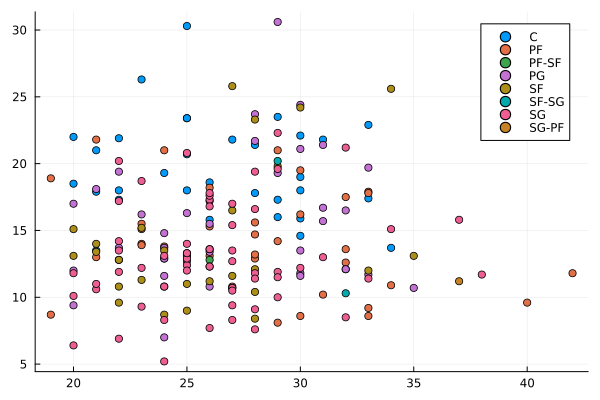

In [131]:
using Plots
using StatsPlots
scatter(
    df[!, :Age],
    df[!, :PER],
    group = df[!, :Pos],
)

We can make the plot more interesting by adding a few custom settings. For example:
* Give it a title
* Provide xlabel and ylabel
* Change the transparency, shape, and size of the dots
* change background color to dark grey

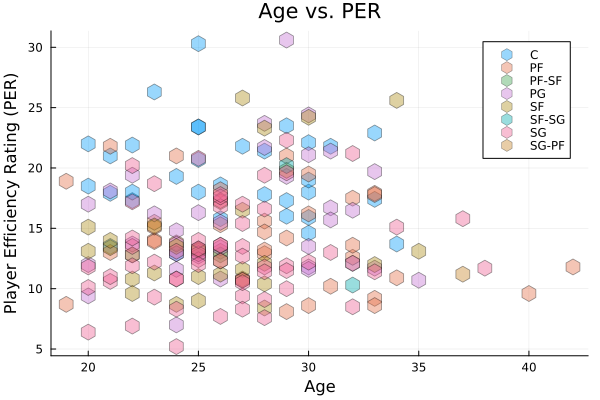

In [134]:
scatter(
    df[!, :Age],
    df[!,  :PER],
    group = df[!, :Pos],
    title = "Age vs. PER",
    xlabel = "Age", 
    ylabel = "Player Efficiency Rating (PER)",
    # marker: opacity, shape, size
    # m = (0.4, :hex, 8),
    alpha = 0.4, 
    marker = :hex, 
    markersize = 8,
    # background color: red, green, blue
    # bg = RGB(.2,.2,.2)
)

You can also do a box plot (with the violin plot in the background) grouped by the species. Note the `!` in `boxplot!` adds the current plot to the existing one. 

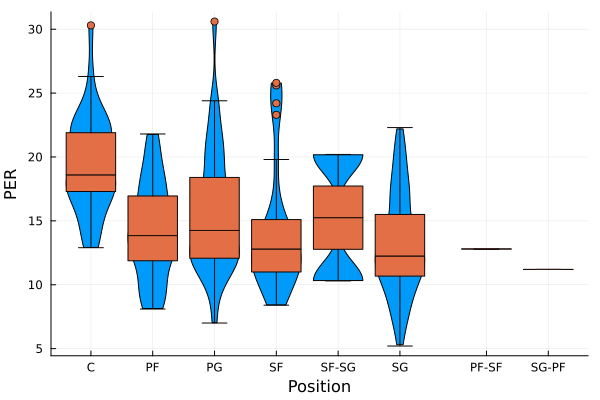

In [135]:
violin(
    df[!, :Pos],
    df[!, :PER],
)
boxplot!(
    df[!, :Pos],
    df[!, :PER], 
    leg = false,
    xlabel = "Position", 
    ylabel = "PER",
)

There are many other types of plots and custom options. Further reading:
- See this [link](https://discourse.julialang.org/t/comparison-of-plotting-packages/99860#summary-of-plotting-packages-1) for a summary of the commonly-used plotting packages in Julia.
- The [Plots.jl tutorial](http://docs.juliaplots.org/latest/tutorial/) introduces you to various types of plots and layout options.